In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
dir_dataset = "C:/Users/0stix/Datasets/"

name_dataset = 'TPS_jan_2022'

df_train = pd.read_csv(dir_dataset+name_dataset+'/train.csv')
df_test = pd.read_csv(dir_dataset+name_dataset+'/test.csv')
df_sub = pd.read_csv(dir_dataset+name_dataset+'/sample_submission.csv')
len_train = len(df_train)
target='num_sold'

# df_all = pd.concat([df_train,df_test],axis=0).drop('row_id',axis=1)
df_all = pd.concat([df_train,df_test],axis=0)

df_all.head(18)
# df_all.tail()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329.0
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520.0
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146.0
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572.0
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911.0
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283.0
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526.0
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906.0
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250.0
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005.0


In [148]:
from itertools import product

df_t = pd.DataFrame()

dct_ = {
    'country':['Finland','Norway','Sweden'],
    'store':['KaggleMart','KaggleRama'],
    'product':['Kaggle Mug','Kaggle Hat','Kaggle Sticker']
}


for country, store, product in product(dct_['country'], dct_['store'], dct_['product']):
    df_t['-'.join([country, store, product])] = df_train[
        (df_train['country']==country) & 
        (df_train['store']==store) & 
        (df_train['product']==product)].set_index('date')['num_sold'].astype(float)
    
# df_t.head()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2015-01-01 to 2018-12-31
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Finland-KaggleMart-Kaggle Mug      1461 non-null   float64
 1   Finland-KaggleMart-Kaggle Hat      1461 non-null   float64
 2   Finland-KaggleMart-Kaggle Sticker  1461 non-null   float64
 3   Finland-KaggleRama-Kaggle Mug      1461 non-null   float64
 4   Finland-KaggleRama-Kaggle Hat      1461 non-null   float64
 5   Finland-KaggleRama-Kaggle Sticker  1461 non-null   float64
 6   Norway-KaggleMart-Kaggle Mug       1461 non-null   float64
 7   Norway-KaggleMart-Kaggle Hat       1461 non-null   float64
 8   Norway-KaggleMart-Kaggle Sticker   1461 non-null   float64
 9   Norway-KaggleRama-Kaggle Mug       1461 non-null   float64
 10  Norway-KaggleRama-Kaggle Hat       1461 non-null   float64
 11  Norway-KaggleRama-Kaggle Sticker   1461 non-nu

                                      SARIMAX Results                                       
Dep. Variable:        Finland-KaggleMart-Kaggle Mug   No. Observations:                 1461
Model:             SARIMAX(2, 1, 3)x(1, 2, [1], 12)   Log Likelihood               -7301.330
Date:                              Fri, 21 Jan 2022   AIC                          14618.660
Time:                                      20:24:03   BIC                          14660.817
Sample:                                  01-01-2015   HQIC                         14634.399
                                       - 12-31-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7573      0.019    -39.971      0.000      -0.794      -0.720
ar.L2         -0.85

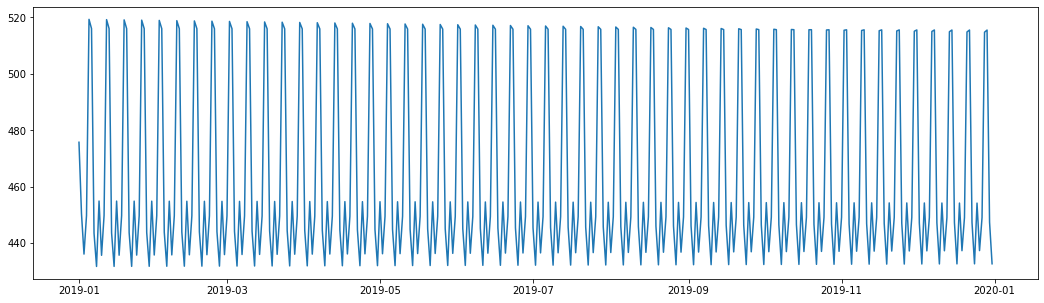

In [244]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining the Model
seas_model = SARIMAX(df_t['Finland-KaggleMart-Kaggle Mug'], order = (2, 1, 3), seasonal_order = (1, 2, 1, 12))
seas_model_results = seas_model.fit()

# print(seas_model_results.summary())



# Displaying the plots
forecast = model_fit.predict(start=idx_start, end=idx_end, typ='levels')

plt.plot(forecast)
plt.show()

In [226]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

def my_auto_arima(data, order, sort='AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []

    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p, d, q))

                try:
                    model_fit = model.fit()
                    c_order = f'p{p} d{d} q{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass

                result_df = pd.DataFrame(list(zip(order_list, aic_list)),
                                         columns=['order', 'AIC'])
                result_df.sort_values(sort, inplace=True)

    return result_df

my_auto_arima(df_t['Finland-KaggleMart-Kaggle Mug'], [5, 3, 5])

,order,AIC
66,p4 d1 q4,13192.558940
65,p4 d1 q3,13506.128538
52,p3 d1 q4,13571.138878
61,p4 d0 q4,13584.381685
60,p4 d0 q3,13585.085255
...,...,...
1,p0 d0 q1,14662.570134
39,p2 d2 q0,14664.323541
25,p1 d2 q0,14936.855997
10,p0 d2 q0,15088.223419


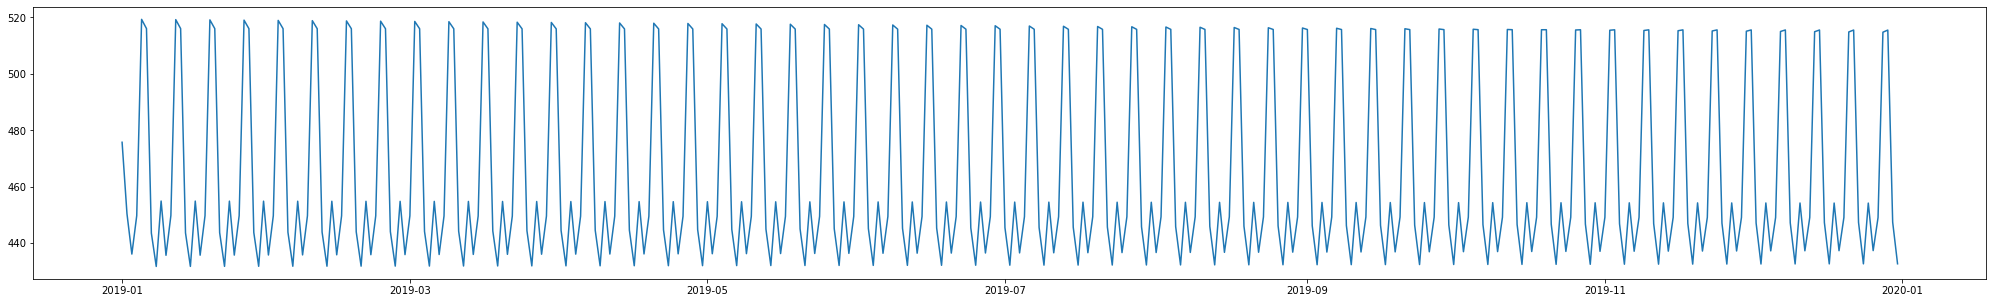

In [238]:
model = ARIMA(df_t['Finland-KaggleMart-Kaggle Mug'], order=(5,1,6))
model_fit = model.fit(trend='nc', full_output=True, disp=1)

import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (35,5)

# model_fit.plot_predict()
# plt.figure(figsize=(20,20))

idx_start = datetime.datetime(2019,1,1)
idx_end = datetime.datetime(2019,12,31)

forecast = model_fit.predict(start=idx_start, end=idx_end, typ='levels')

plt.plot(forecast)
plt.show()

# print(model_fit.summary())

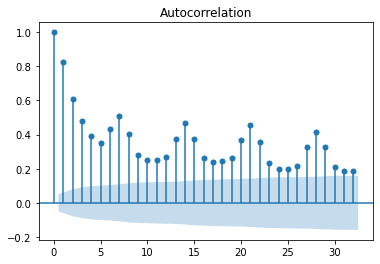

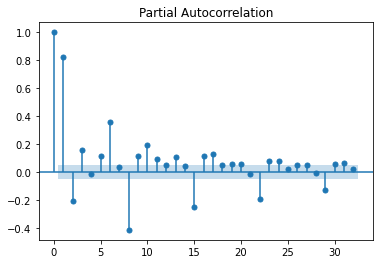

<Figure size 1440x288 with 0 Axes>

In [150]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_t['Finland-KaggleMart-Kaggle Mug'])
plot_pacf(df_t['Finland-KaggleMart-Kaggle Mug'])
plt.figure(figsize=(20, 4))
plt.show()

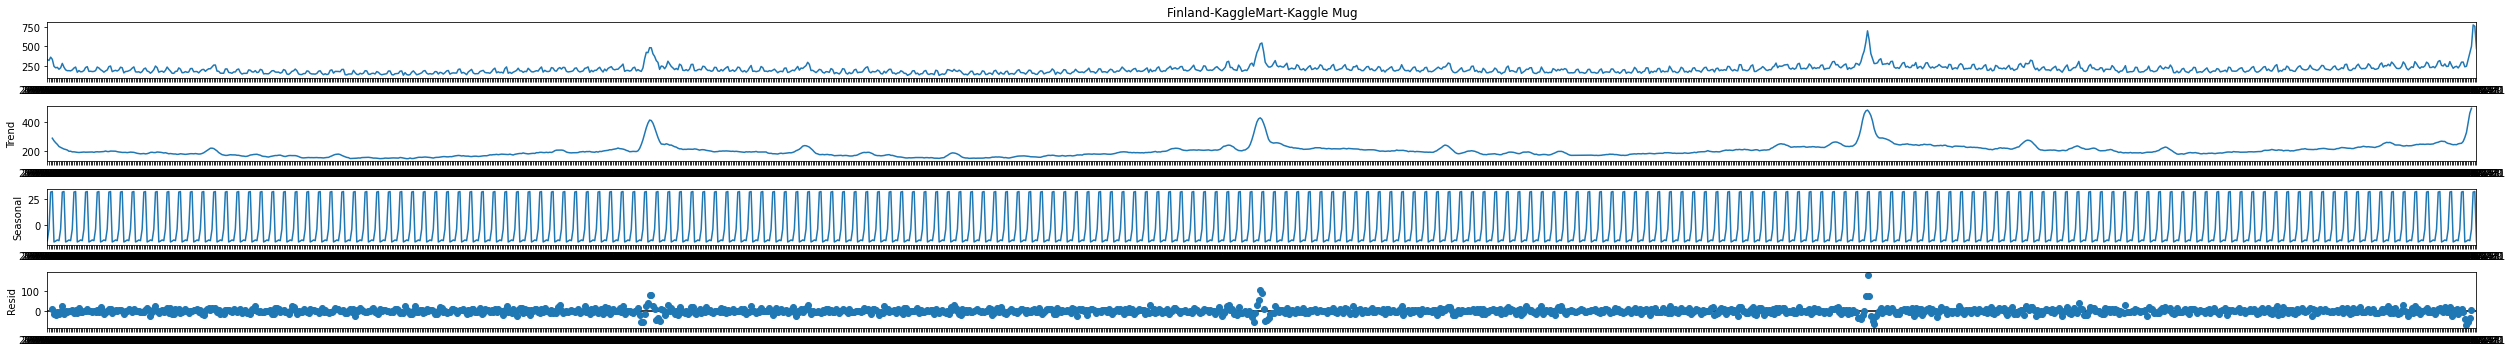

In [223]:
import statsmodels.tsa.api as tsa
model_series = tsa.seasonal_decompose(df_t['Finland-KaggleMart-Kaggle Mug'], period=7, model='additive')

fig = model_series.plot()
plt.show()

In [ ]:
model_series.

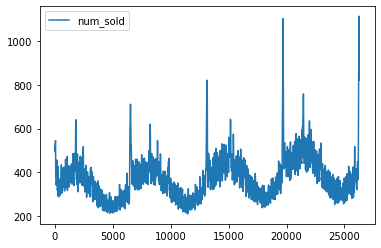

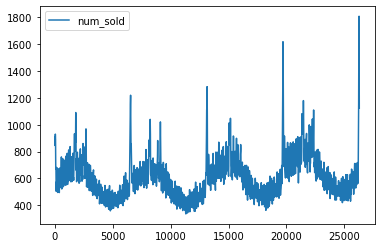

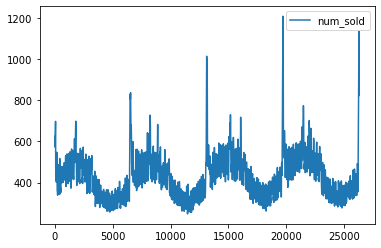

In [84]:
df_all[(df_all['country']=='Finland') & (df_all['store']=='KaggleMart') & (df_all['product']=='Kaggle Hat')][['date','num_sold']].plot()
df_all[(df_all['country']=='Norway') & (df_all['store']=='KaggleMart') & (df_all['product']=='Kaggle Hat')][['date','num_sold']].plot()
df_all[(df_all['country']=='Sweden') & (df_all['store']=='KaggleMart') & (df_all['product']=='Kaggle Hat')][['date','num_sold']].plot()

plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
# import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object


import os
import warnings        
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.

weather_station_location = pd.read_csv("../01. Data/Weather Station Locations.csv")
weather = pd.read_csv("../01. Data/Summary of Weather.csv")

weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather = weather.loc[:,["STA","Date","MeanTemp"] ]


weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == int(weather_station_id)]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])


plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()


# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)


from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['MeanTemp'], model='additive', freq=7)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 15)


import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)


from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [14]:
from sklearn.preprocessing import OneHotEncoder

df_v0 = pd.DataFrame()
df_v0['datetime'] = pd.to_datetime(df_all['date'])

# df_v0 = pd.concat([df_v0, pd.get_dummies(df_v0['datetime'].dt.year.astype('category').cat.codes, prefix='year')], axis=1)
df_v0 = pd.concat([df_v0, pd.get_dummies(df_v0['datetime'].dt.month.astype('category').cat.codes, prefix='month')], axis=1)
df_v0 = pd.concat([df_v0, pd.get_dummies(df_v0['datetime'].dt.day.astype('category').cat.codes, prefix='day')], axis=1)
df_v0 = pd.concat([df_v0, pd.get_dummies(df_v0['datetime'].dt.dayofweek.astype('category').cat.codes, prefix='week')], axis=1)

df_v0.drop('datetime', axis=1, inplace=True)

for attrib in ['country', 'store', 'product']:
    df_v0[attrib] = df_all[attrib].astype('category').cat.codes


df_v0[target] = df_all[target].copy()
df_train_v0 = df_v0[:len_train]
df_test_v0 = df_v0[len_train:]

X_, y_ = df_v0.drop([target], axis=1).values, df_v0[[target]].values
X_train, test_, y_train = X_[:len_train], X_[len_train:], y_[:len_train]

df_v0.head()

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,week_1,week_2,week_3,week_4,week_5,week_6,country,store,product,num_sold
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,329.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,520.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,146.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,572.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,911.0


In [15]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_t, X_v, y_t, y_v = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
X_t.shape,X_v.shape,y_t.shape,y_v.shape

((23668, 53), (2630, 53), (23668, 1), (2630, 1))

In [16]:
rf_reg = LGBMRegressor()
rf_reg.fit(X_t, y_t.flatten())
y_p = rf_reg.predict(X_v)

In [17]:
def smape(A, F):
    return 100 / len(A) * np.sum(np.abs(F - A) / (np.abs(A) + np.abs(F)))

smape_ = smape(y_p, y_v.flatten())
print('smape: ', smape_)

smape:  4.069026353257181


In [18]:
df_sub[target] = rf_reg.predict(test_)

import datetime
now = datetime.datetime.now()
str_datetime = now.strftime("%y%m%d_%H%M%S")
df_sub.to_csv(dir_dataset+'submission-'+name_dataset+'-'+str_datetime+'.csv', index = 0)

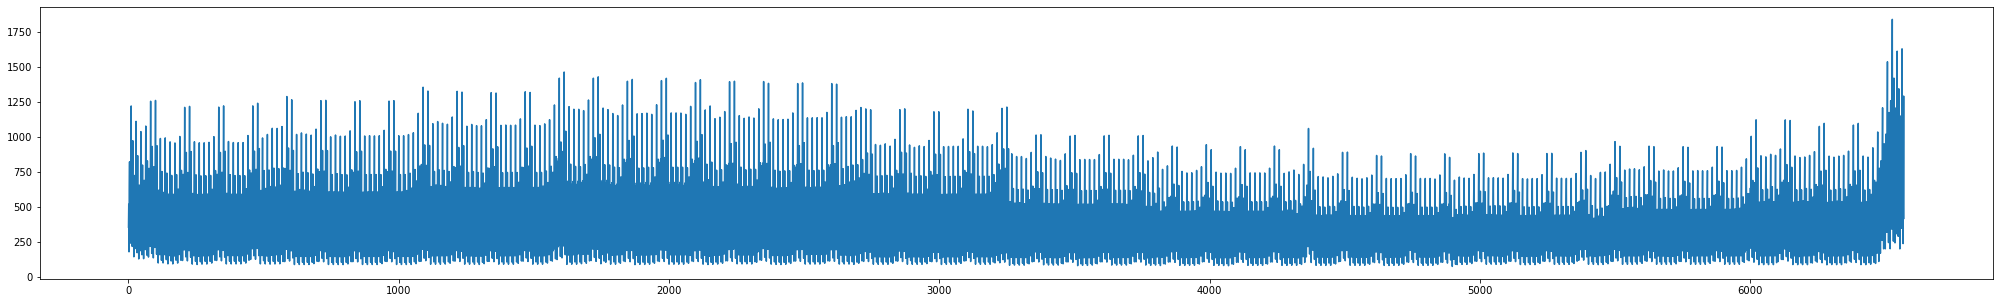

In [13]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (35,5)
df_sub[target].plot()
plt.show()